In [1]:
ls -lh /n/data1/hms/dbmi/zitnik/lab/users/was966/ITRP/RData2csv/immuno

total 416K
drwxrwsr-x 2 was966 zitnik 256 Aug 18 11:43 dat.Chen.RData/
drwxrwsr-x 2 was966 zitnik 395 Aug 18 11:43 dat.Cho.RData/
drwxrwsr-x 2 was966 zitnik 487 Aug 18 11:43 dat.Gide.RData/
drwxrwsr-x 2 was966 zitnik 478 Aug 18 11:43 dat.Huang.RData/
drwxrwsr-x 2 was966 zitnik 481 Aug 18 11:43 dat.Hwang.RData/
drwxrwsr-x 2 was966 zitnik 395 Aug 18 11:43 dat.Kim.RData/
drwxrwsr-x 2 was966 zitnik 597 Aug 18 11:44 dat.Liu.RData/
drwxrwsr-x 2 was966 zitnik 660 Aug 18 11:44 dat.Miao.RData/
drwxrwsr-x 2 was966 zitnik 369 Aug 18 11:44 dat.Nathanson_pre.RData/
drwxrwsr-x 2 was966 zitnik 721 Aug 18 11:44 dat.Prat.RData/
drwxrwsr-x 2 was966 zitnik 453 Aug 18 11:44 dat.Riaz.RData/
drwxrwsr-x 2 was966 zitnik 569 Aug 18 11:44 dat.Snyder.RData/
drwxrwsr-x 2 was966 zitnik 476 Aug 18 11:44 dat.VanAllen.RData/


In [2]:
ls -lh /n/data1/hms/dbmi/zitnik/lab/users/was966/ITRP/RData2csv/immuno/dat.Liu.RData/

total 162M
-rw-rw-r-- 1 was966 zitnik  620 Aug 18 11:43 biopsyContext (1=Pre-Ipi; 2=On-Ipi; 3=Pre-PD1; 4=On-PD1).txt
-rw-rw-r-- 1 was966 zitnik  23K Aug 18 11:43 clin.txt
-rw-rw-r-- 1 was966 zitnik   13 Aug 18 11:43 drugs.txt
-rw-rw-r-- 1 was966 zitnik 250K Aug 18 11:43 genes.txt
-rw-rw-r-- 1 was966 zitnik  44M Aug 18 11:44 mRNA.norm3.txt
-rw-rw-r-- 1 was966 zitnik  44M Aug 18 11:44 mRNA.rank2.txt
-rw-rw-r-- 1 was966 zitnik  44M Aug 18 11:44 mRNA.rank.txt
-rw-rw-r-- 1 was966 zitnik  31M Aug 18 11:43 mRNA.txt
-rw-rw-r-- 1 was966 zitnik  741 Aug 18 11:43 response.txt
-rw-rw-r-- 1 was966 zitnik 1.7K Aug 18 11:43 samples.txt
-rw-rw-r-- 1 was966 zitnik  620 Aug 18 11:43 sex.txt
-rw-rw-r-- 1 was966 zitnik  620 Aug 18 11:43 stage.txt
-rw-rw-r-- 1 was966 zitnik 1.1K Aug 18 11:43 surv.dt2.txt
-rw-rw-r-- 1 was966 zitnik 1.1K Aug 18 11:43 surv.dt.txt
-rw-rw-r-- 1 was966 zitnik 1.1K Aug 18 11:43 survival2.txt
-rw-rw-r-- 1 was966 zitnik 1.1K Aug 18 11:43 survival.txt
-rw-rw-r-- 1 was966 zitnik    8

In [3]:
import pandas as pd
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

data_path = '/n/data1/hms/dbmi/zitnik/lab/users/was966/ITRP/RData2csv/immuno/'
rdatas = glob(os.path.join(data_path, '*.RData'))

In [4]:
rdata = '/n/data1/hms/dbmi/zitnik/lab/users/was966/ITRP/RData2csv/immuno/dat.Liu.RData'

In [5]:
#cp /n/data1/hms/dbmi/zitnik/lab/users/was966/ITRP/RData2csv/immuno/dat.Gide.RData/*.txt ./raw/

In [6]:
df_mRNA = pd.read_csv(os.path.join(rdata, 'mRNA.txt'), sep='\t')
samples = pd.read_csv(os.path.join(rdata, 'samples.txt'), sep='\t').x.to_frame(name='samples')
df_mRNA.columns = samples.samples

df_mRNA.head(3)

samples,Patient100,Patient102,Patient105,Patient106,Patient107,Patient108,Patient10,Patient112,Patient116,Patient117,...,Patient200,Patient201,Patient203,Patient193,Patient195,Patient196,Patient197,Patient204,Patient205,Patient206
A1BG,19.614242,20.075427,13.009169,18.363130,0.0,0.606043,10.049930,17.782720,16.188170,16.491696,...,17.219102,40.47852,23.028856,13.831856,18.570674,24.699800,70.098366,10.518109,21.005952,9.232322
A1BG-AS1,0.826789,0.555721,0.000000,0.902715,0.0,0.000000,0.720561,1.191326,2.197810,2.039296,...,2.502559,0.00000,1.317041,1.416334,1.161784,1.678815,1.780975,1.887154,2.471288,1.895923
A1CF,0.035182,0.208395,0.000000,0.000000,0.0,0.000000,0.000000,0.116227,0.094529,0.044333,...,0.093379,0.00000,0.038737,0.000000,0.000000,0.289451,0.000000,0.000000,0.000000,0.000000


In [7]:
response= pd.read_csv(os.path.join(rdata, 'response.txt'), sep='\t').x.to_frame(name='response')
resmap = {'PD':'nonresponder', 'CR':'responder', 'PR':'responder', 'SD':'nonresponder'}
flag = response.response.map(resmap).map({'nonresponder':0, 'responder':1}).to_frame(name='flag')
gender = pd.read_csv(os.path.join(rdata, 'sex.txt'), sep='\t').x.to_frame(name='gender')

treatment = pd.read_csv(os.path.join(rdata, 'treatment.txt'), sep='\t').x.to_frame(name='treatment')
survival = pd.read_csv(os.path.join(rdata, 'survival2.txt'), sep='\t')
survival.columns = ['time', 'status']

clin = pd.read_csv(os.path.join(rdata, 'clin.txt'), sep='\t')
clin = clin[clin.columns[1:]]
stage = pd.read_csv(os.path.join(rdata, 'stage.txt'), sep='\t').x.to_frame(name='stage')

df_samples = samples.join(flag).join(response).join(gender).join(treatment).join(stage).join(survival).join(clin).set_index('samples')

In [8]:
df_samples.shape

(121, 52)

In [9]:
captureSize = 35.8 #for tmb claculation


VC_NONSYNONYMOUS_LIST = ['Frame_Shift_Del',
                         'Frame_Shift_Ins',
                         'In_Frame_Del',
                         'In_Frame_Ins',
                         'Missense_Mutation',
                         'Nonsense_Mutation',
                         'Splice_Site',
                         'Nonstop_Mutation',
                         'Splice_Region']

truncate_mut_LIST = ['Nonsense_Mutation', 'Frame_Shift_Ins','Frame_Shift_Del','Splice_Site']
nontruncate_mut_LIST = ['Missense_Mutation','In_Frame_Del', 'In_Frame_Ins','Nonstop_Mutation']

mut = pd.read_csv('./raw/all_mutation.csv', sep=',')

mut['nansynonymous_mut_flag'] = mut.Variant_Classification.isin(VC_NONSYNONYMOUS_LIST)
mut['truncate_mut_flag'] = mut.Variant_Classification.isin(truncate_mut_LIST)
mut['nontruncate_mut_flag'] = mut.Variant_Classification.isin(nontruncate_mut_LIST)


I_calculated_TMB1 = mut.groupby('Patient').nansynonymous_mut_flag.sum()
I_calculated_TMB2 = mut.groupby('Patient').apply(lambda x:x.truncate_mut_flag.sum()*2+x.nontruncate_mut_flag.sum())

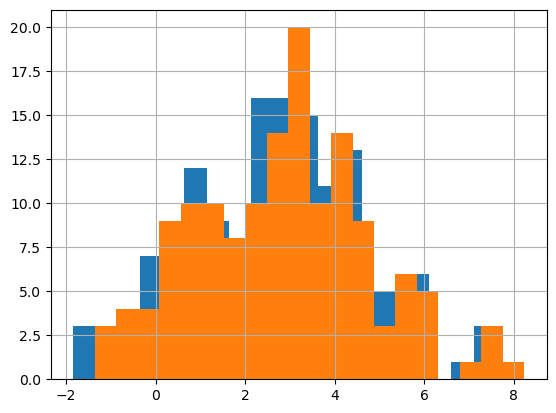

In [10]:
#for tmb claculation
tmb1 = np.log2(I_calculated_TMB1/captureSize)
tmb2 = np.log2(I_calculated_TMB2/captureSize)

tmb1.hist(bins=20)
tmb2.hist(bins=20)

tmb = tmb1.to_frame('tmb.dan').join(tmb2.to_frame(name = 'tmb.wang'))
df_samples = df_samples.join(tmb)

In [11]:
df_samples = df_samples[~df_samples.flag.isna()]
df_samples.to_csv('./processed/samples.csv')

In [12]:
df_mRNA = df_mRNA[df_samples.index]
df_mRNA.to_csv('./processed/abundance.csv')

In [13]:
df_mRNA.shape

(20848, 119)

In [14]:
df_samples.flag.value_counts()

flag
0.0    72
1.0    47
Name: count, dtype: int64

In [15]:
df_samples.columns

Index(['flag', 'response', 'gender', 'treatment', 'stage', 'time', 'status',
       'total_muts', 'nonsyn_muts', 'clonal_muts', 'subclonal_muts',
       'heterogeneity', 'total_neoantigens', 'CNA_prop',
       'gender (Male=1, Female=0)', 'biopsy site', 'monthsBiopsyPreTx', 'BR',
       'PFS', 'OS', 'TimeToBR', 'cyclesOnTherapy', 'txOngoing', 'Tx',
       'Mstage (IIIC=0, M1a=1, M1b=2, M1c=3)', 'Tx_Start_ECOG', 'Tx_Start_LDH',
       'LDH_Elevated', 'Brain_Met', 'Cut_SubQ_Met', 'LN_Met', 'Lung_Met',
       'Liver_Visc_Met', 'Bone_Met', 'progressed', 'dead', 'Primary_Type',
       'Histology', 'IOTherapy', 'steroidsGT10mgDaily', 'priorMAPKTx',
       'priorCTLA4', 'postCTLA4', 'postMAPKTx', 'postCombinedCTLA_PD1',
       'numPriorTherapies', 'biopsy site_categ',
       'biopsyContext (1=Pre-Ipi; 2=On-Ipi; 3=Pre-PD1; 4=On-PD1)',
       'daysBiopsyToPD1', 'daysBiopsyAfterIpiStart', 'purity', 'ploidy',
       'tmb.dan', 'tmb.wang'],
      dtype='object')